<a href="https://colab.research.google.com/github/Jonny-T87/NBA-Trends/blob/main/NBATrends_Project_2_Part_4_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Project 2 - NBA Dataset

Jonny Tesfahun

- 07/14/22

1. Source of data

 - https://www.kaggle.com/datasets/nathanlauga/nba-games?select=ranking.csv

 - using games.csv file 

2. Brief description of data

 - The data is a collection of NBA games data from the 2004 season to dec 2020 season. The file contains all games home and away data. Some of these include home points, away points, FG percent home & away, FT percent home & away.
 
3. What is the target?
 - My target for this dataset would be Home_Team_Wins

4. Is this a classification or regression problem?
 - This is a regression problem. I hope to be using linear regression.

5. How many features?
 - There will be 7 features. They include Pts_home, Fg_pct_home, Fg3_pct_home, Ast_home, Reb_home, Pts_away, and Fg_pct_away. 

6. How many rows of data.
 - As many needed for the machine to learn and better predict.

7. What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?
 - The first challenge may be that there might not be the strongest correlation between target and features. The second would be understanding how to evaluate a percentage as a prediction.


##Dataset: Loading Data & Libraries

In [820]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import calendar

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_fscore_support

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [821]:
#NBA dataset loading
df = pd.read_csv('/content/drive/MyDrive/DojoBootCamp/Project Files/games.csv')
df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-03-12,22101005,Final,1610612748,1610612750,2021,1610612748,104.0,0.398,0.760,...,23.0,53.0,1610612750,113.0,0.422,0.875,0.357,21.0,46.0,0
1,2022-03-12,22101006,Final,1610612741,1610612739,2021,1610612741,101.0,0.443,0.933,...,20.0,46.0,1610612739,91.0,0.419,0.824,0.208,19.0,40.0,1
2,2022-03-12,22101007,Final,1610612759,1610612754,2021,1610612759,108.0,0.412,0.813,...,28.0,52.0,1610612754,119.0,0.489,1.000,0.389,23.0,47.0,0
3,2022-03-12,22101008,Final,1610612744,1610612749,2021,1610612744,122.0,0.484,0.933,...,33.0,55.0,1610612749,109.0,0.413,0.696,0.386,27.0,39.0,1
4,2022-03-12,22101009,Final,1610612743,1610612761,2021,1610612743,115.0,0.551,0.750,...,32.0,39.0,1610612761,127.0,0.471,0.760,0.387,28.0,50.0,0


In [822]:
#Checking dataset infos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25796 entries, 0 to 25795
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     25796 non-null  object 
 1   GAME_ID           25796 non-null  int64  
 2   GAME_STATUS_TEXT  25796 non-null  object 
 3   HOME_TEAM_ID      25796 non-null  int64  
 4   VISITOR_TEAM_ID   25796 non-null  int64  
 5   SEASON            25796 non-null  int64  
 6   TEAM_ID_home      25796 non-null  int64  
 7   PTS_home          25697 non-null  float64
 8   FG_PCT_home       25697 non-null  float64
 9   FT_PCT_home       25697 non-null  float64
 10  FG3_PCT_home      25697 non-null  float64
 11  AST_home          25697 non-null  float64
 12  REB_home          25697 non-null  float64
 13  TEAM_ID_away      25796 non-null  int64  
 14  PTS_away          25697 non-null  float64
 15  FG_PCT_away       25697 non-null  float64
 16  FT_PCT_away       25697 non-null  float6

In [823]:
#checking what correlation is for target and features
df.corr()

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
GAME_ID,1.000000,-0.026348,-0.031471,0.095721,-0.026348,0.033727,0.018384,0.036256,-0.004041,-0.032486,-0.006294,-0.031471,0.004002,0.005716,0.033366,-0.002642,-0.042501,-0.024355,0.030402
HOME_TEAM_ID,-0.026348,1.000000,-0.045911,0.000461,1.000000,-0.024372,-0.008239,-0.009983,0.002748,-0.097061,-0.026674,-0.045911,-0.006496,0.022197,0.016042,0.015525,-0.066744,-0.025784,-0.023604
VISITOR_TEAM_ID,-0.031471,-0.045911,1.000000,0.002195,-0.045911,-0.000120,0.035072,0.004108,0.017292,0.018287,-0.002759,1.000000,-0.032583,-0.026651,-0.018476,-0.022625,-0.013180,-0.010262,0.030571
SEASON,0.095721,0.000461,0.002195,1.000000,0.000461,0.345022,0.039355,0.065950,0.024126,0.192337,0.162529,0.002195,0.378888,0.073299,0.066808,0.020564,0.255330,0.199832,-0.028197
TEAM_ID_home,-0.026348,1.000000,-0.045911,0.000461,1.000000,-0.024372,-0.008239,-0.009983,0.002748,-0.097061,-0.026674,-0.045911,-0.006496,0.022197,0.016042,0.015525,-0.066744,-0.025784,-0.023604
PTS_home,0.033727,-0.024372,-0.000120,0.345022,-0.024372,1.000000,0.661964,0.184323,0.423277,0.601088,0.163020,-0.000120,0.483321,0.128207,0.069504,0.057260,0.208445,-0.139219,0.398901
FG_PCT_home,0.018384,-0.008239,0.035072,0.039355,-0.008239,0.661964,1.000000,0.018565,0.449595,0.549268,-0.188445,0.035072,0.114863,0.039905,0.030386,0.014223,0.013061,-0.464576,0.433626
FT_PCT_home,0.036256,-0.009983,0.004108,0.065950,-0.009983,0.184323,0.018565,1.000000,0.028656,0.018711,-0.052373,0.004108,0.075251,0.046824,0.036861,0.021528,0.029812,-0.115124,0.092710
FG3_PCT_home,-0.004041,0.002748,0.017292,0.024126,0.002748,0.423277,0.449595,0.028656,1.000000,0.351811,-0.087723,0.017292,0.046740,0.008265,0.015199,-0.001993,-0.002371,-0.201855,0.300804
AST_home,-0.032486,-0.097061,0.018287,0.192337,-0.097061,0.601088,0.549268,0.018711,0.351811,1.000000,0.066332,0.018287,0.183636,0.006043,0.026035,-0.006692,0.142278,-0.108505,0.303889


##Dataset: Cleaning

In [824]:
#looking to see what to drop based on unique data, that will not help model
df.nunique()

GAME_DATE_EST        4149
GAME_ID             25767
GAME_STATUS_TEXT        1
HOME_TEAM_ID           30
VISITOR_TEAM_ID        30
SEASON                 19
TEAM_ID_home           30
PTS_home              100
FG_PCT_home           399
FT_PCT_home           403
FG3_PCT_home          427
AST_home               42
REB_home               55
TEAM_ID_away           30
PTS_away              106
FG_PCT_away           390
FT_PCT_away           380
FG3_PCT_away          409
AST_away               41
REB_away               52
HOME_TEAM_WINS          2
dtype: int64

In [825]:
#checking for duplicates 
df.duplicated().sum()

0

In [826]:
#Checking for NaN in target or features
df.isna().sum()

GAME_DATE_EST        0
GAME_ID              0
GAME_STATUS_TEXT     0
HOME_TEAM_ID         0
VISITOR_TEAM_ID      0
SEASON               0
TEAM_ID_home         0
PTS_home            99
FG_PCT_home         99
FT_PCT_home         99
FG3_PCT_home        99
AST_home            99
REB_home            99
TEAM_ID_away         0
PTS_away            99
FG_PCT_away         99
FT_PCT_away         99
FG3_PCT_away        99
AST_away            99
REB_away            99
HOME_TEAM_WINS       0
dtype: int64

In [827]:
#the target data looks nicely balanced
df['HOME_TEAM_WINS'].value_counts()

1    15155
0    10641
Name: HOME_TEAM_WINS, dtype: int64

In [828]:
#Looking for outliers in target and features, 
#Some crazy numbers like 50 ASt_home, 168 Pts home, and 72 Reb home but nothing unbelievable. Since it is team sport. 
df.describe()

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
count,2.579600e+04,2.579600e+04,2.579600e+04,25796.000000,2.579600e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,2.579600e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25796.000000
mean,2.169208e+07,1.610613e+09,1.610613e+09,2011.798341,1.610613e+09,103.106044,0.460313,0.759705,0.355896,22.736779,43.345799,1.610613e+09,100.294120,0.449265,0.758082,0.349413,21.403899,42.085146,0.587494
std,5.496041e+06,8.638857e+00,8.654846e+00,5.397985,8.638857e+00,13.174726,0.056629,0.100692,0.111940,5.177566,6.621832,8.654846e+00,13.343016,0.055528,0.103418,0.110194,5.140897,6.526951,0.492295
min,1.030000e+07,1.610613e+09,1.610613e+09,2003.000000,1.610613e+09,36.000000,0.250000,0.143000,0.000000,6.000000,15.000000,1.610613e+09,33.000000,0.244000,0.143000,0.000000,4.000000,19.000000,0.000000
25%,2.060109e+07,1.610613e+09,1.610613e+09,2007.000000,1.610613e+09,94.000000,0.421000,0.696000,0.286000,19.000000,39.000000,1.610613e+09,91.000000,0.412000,0.692000,0.278000,18.000000,38.000000,0.000000
50%,2.120040e+07,1.610613e+09,1.610613e+09,2012.000000,1.610613e+09,103.000000,0.459000,0.765000,0.355000,23.000000,43.000000,1.610613e+09,100.000000,0.448000,0.765000,0.350000,21.000000,42.000000,1.000000
75%,2.170070e+07,1.610613e+09,1.610613e+09,2016.000000,1.610613e+09,112.000000,0.500000,0.829000,0.429000,26.000000,48.000000,1.610613e+09,109.000000,0.487000,0.833000,0.420000,25.000000,46.000000,1.000000
max,5.200021e+07,1.610613e+09,1.610613e+09,2021.000000,1.610613e+09,168.000000,0.684000,1.000000,1.000000,50.000000,72.000000,1.610613e+09,168.000000,0.687000,1.000000,1.000000,46.000000,81.000000,1.000000


##Multivariate Exploratory Visuals: 
- To further understand the data.

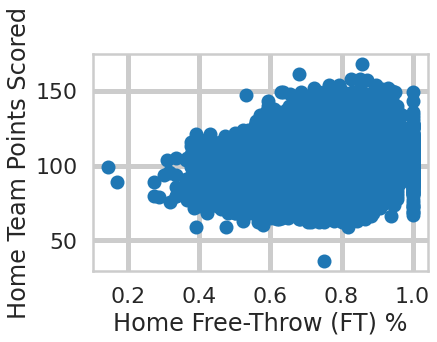

In [829]:
#A univariate visuals of Home team points based on FT %
plt.scatter(df['FT_PCT_home'], df['PTS_home'])
plt.xlabel('Home Free-Throw (FT) %')
plt.ylabel('Home Team Points Scored');

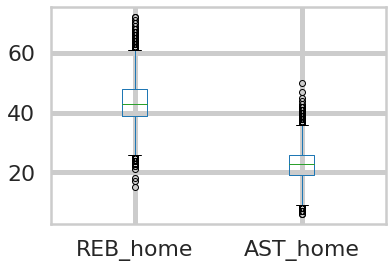

In [830]:
#Boxplot of home rebounds and home assists
boxplot = df.boxplot(column= ['REB_home', 'AST_home']);

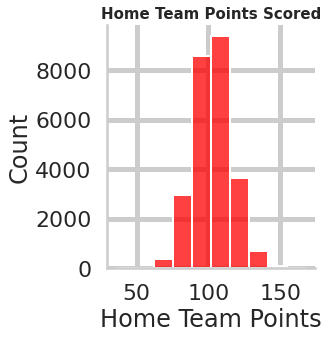

In [831]:
#seaborn displot of amount Home Team Points 
sns.displot(df['PTS_home'], kde=False, bins=10, color='red')
plt.xlabel('Home Team Points')
plt.title('Home Team Points Scored', fontsize = 15, fontweight = 'bold');

##Feature Engineering Datetime:
- For month trends.

In [832]:
#Changing date from Object to datetime format
df['GAME_DATE_EST'] = pd.to_datetime(df['GAME_DATE_EST'])

In [833]:
#Featuring Enginering to find certain month points are scored more 
df['GAME_month'] = df['GAME_DATE_EST'].dt.month
df['GAME_month']

0         3
1         3
2         3
3         3
4         3
         ..
25791    10
25792    10
25793    10
25794    10
25795    10
Name: GAME_month, Length: 25796, dtype: int64

In [834]:
# Drop unnecessary columns
df = df.drop(columns= ['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'TEAM_ID_home', 'TEAM_ID_away',
                  'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away'])


In [835]:
#checking columns are dropped, looks great 
df.head()

,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,HOME_TEAM_WINS,GAME_month
0,2021,104.0,0.398,0.760,0.333,23.0,53.0,113.0,0,3
1,2021,101.0,0.443,0.933,0.429,20.0,46.0,91.0,1,3
2,2021,108.0,0.412,0.813,0.324,28.0,52.0,119.0,0,3
3,2021,122.0,0.484,0.933,0.400,33.0,55.0,109.0,1,3
4,2021,115.0,0.551,0.750,0.407,32.0,39.0,127.0,0,3


## Multivariate Presentation Visuals: 
- To visually explain trends and key findings of interest to stakeholders.

In [836]:
#seaborn pairplot of target and features
#sns.pairplot(df)

In [837]:
#Taking a look at correlation using seaborn heatmap
#sns.heatmap(df.corr())

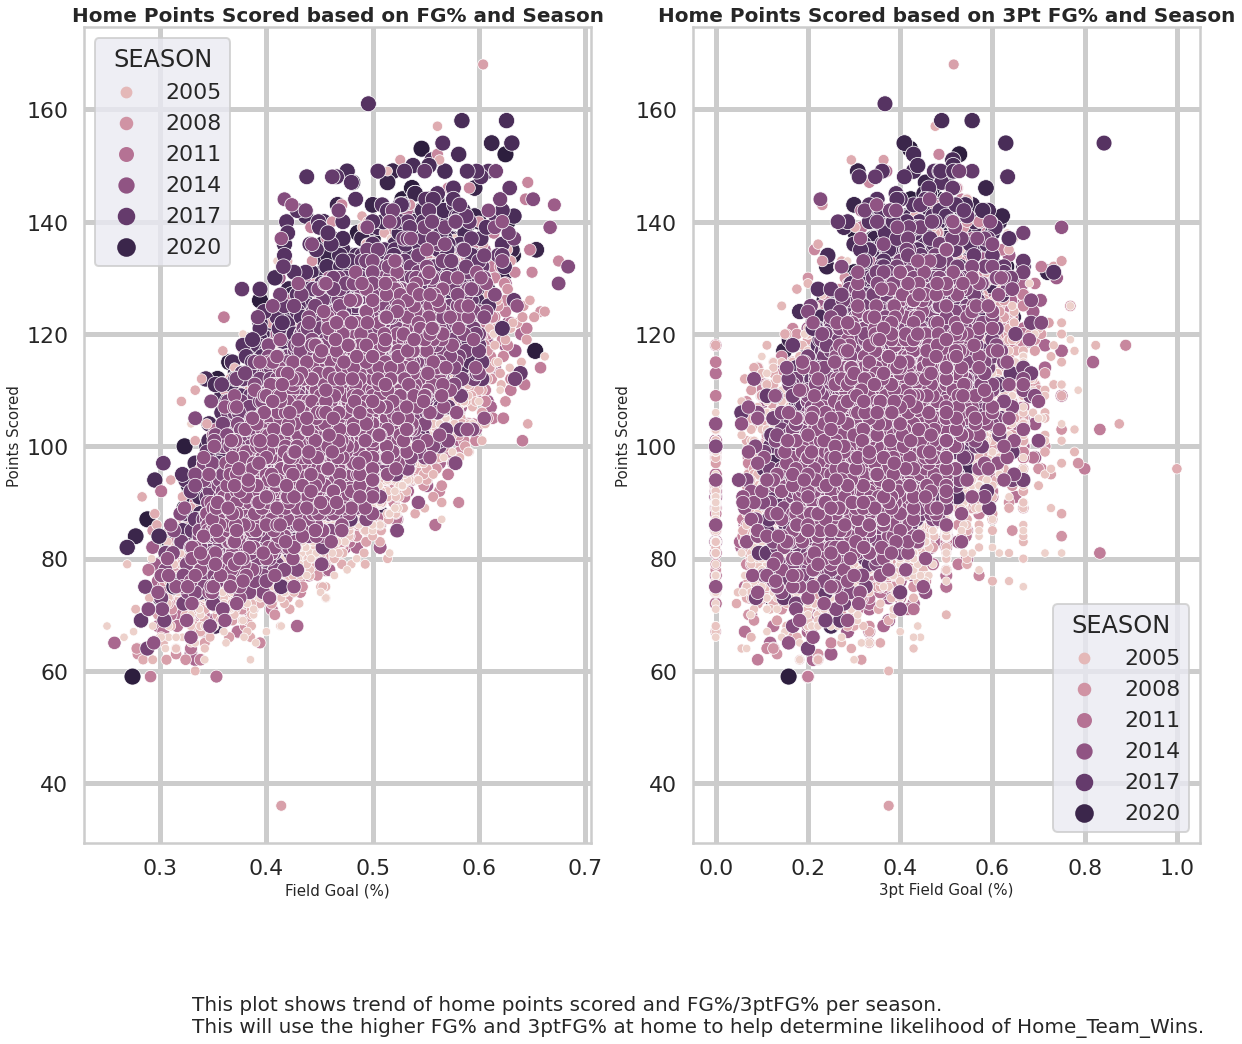

In [838]:
#Presentation #1 - FG and FG3pt correlation
fig, axes = plt.subplots(ncols=2, figsize=(20,15))
sns.set_style("dark")
sns.scatterplot(data=df, x='FG_PCT_home', y='PTS_home', hue='SEASON', size='SEASON', ax=axes[0])
axes[0].set_title('Home Points Scored based on FG% and Season', fontsize = 20, fontweight = 'bold')
axes[0].set_xlabel('Field Goal (%)', fontsize = 15)
axes[0].set_ylabel('Points Scored', fontsize = 15)
plt.legend(title='Season (Yr)', bbox_to_anchor=(1.02, 1))

sns.scatterplot(data=df, x='FG3_PCT_home', y='PTS_home', hue='SEASON', size='SEASON', ax=axes[1])
axes[1].set_title('Home Points Scored based on 3Pt FG% and Season', fontsize = 20, fontweight = 'bold')
axes[1].set_xlabel('3pt Field Goal (%)', fontsize = 15)
axes[1].set_ylabel('Points Scored', fontsize = 15)

plt.figtext(0.2, -0.05, "This plot shows trend of home points scored and FG%/3ptFG% per season. \nThis will use the higher FG% and 3ptFG% at home to help determine likelihood of Home_Team_Wins.", fontsize=20)

plt.tight_layout;

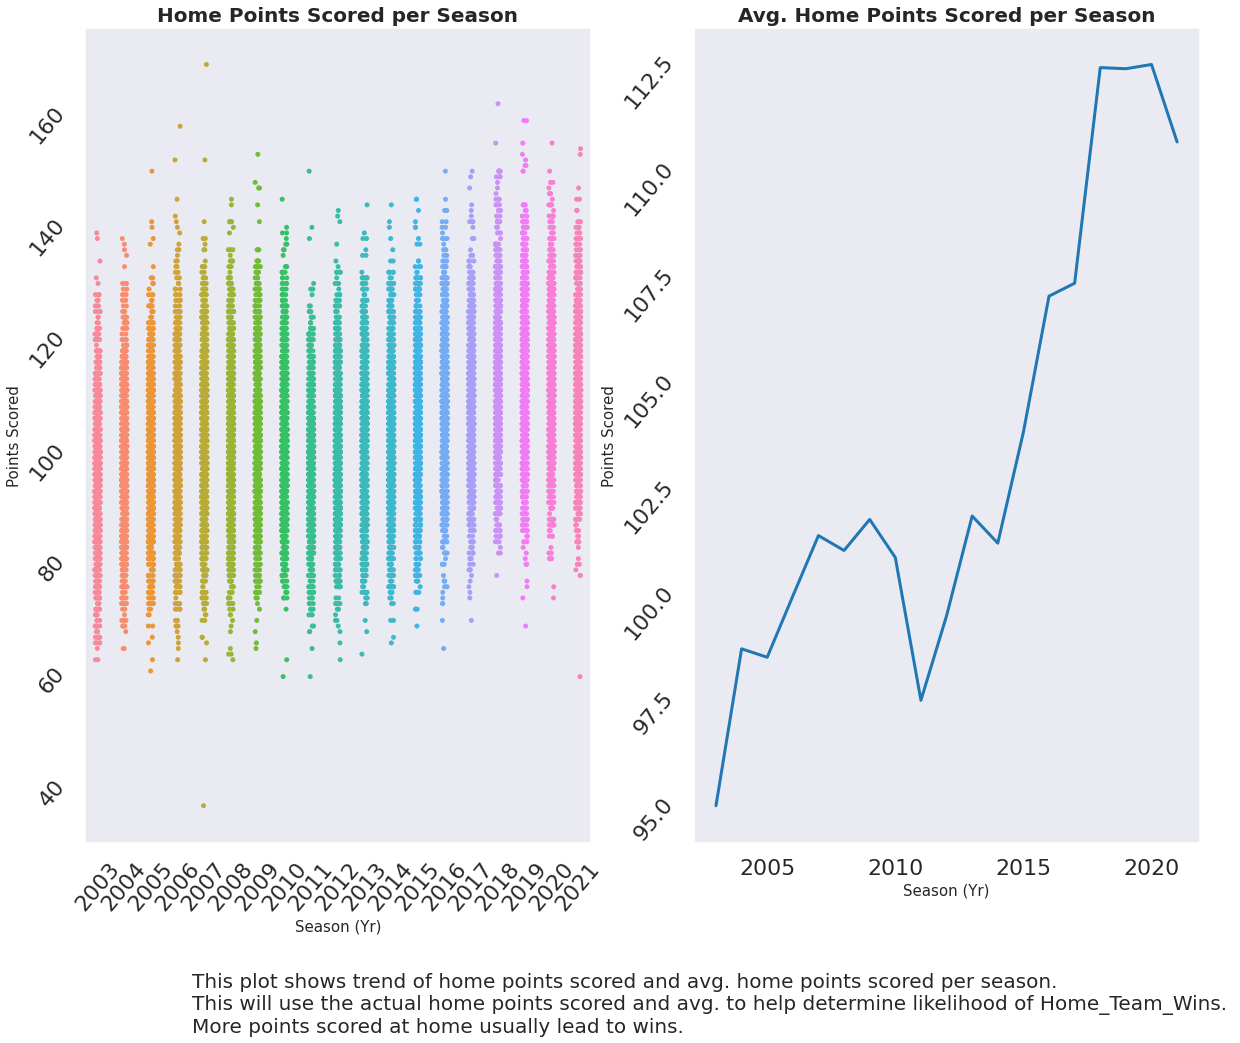

In [839]:
#Presentation #2 - Points and Avg. Points per Season Increase
fig, axes = plt.subplots(ncols=2, figsize=(20,15))
for ax in fig.axes:
    ax.tick_params(labelrotation=50)
#source for tick_param = https://stackoverflow.com/questions/19273040/rotating-axis-text-for-each-subplot

sns.set_context("poster", font_scale = 1, rc={"grid.linewidth": 5})
sns.stripplot(x="SEASON", y="PTS_home", data=df, ax=axes[0])
axes[0].set_xlabel('Season (Yr)', fontsize = 15)
axes[0].set_ylabel('Points Scored', fontsize = 15)
axes[0].set_title('Home Points Scored per Season',  fontsize = 20, fontweight='bold')

df.groupby('SEASON')['PTS_home'].mean().plot()
axes[1].set_title('Avg. Home Points Scored per Season', fontsize = 20, fontweight='bold')
axes[1].set_xlabel('Season (Yr)', fontsize = 15)
axes[1].set_ylabel('Points Scored', fontsize = 15)

plt.figtext(0.2, -0.05, "This plot shows trend of home points scored and avg. home points scored per season. \nThis will use the actual home points scored and avg. to help determine likelihood of Home_Team_Wins. \nMore points scored at home usually lead to wins.", fontsize=20)

plt.tight_layout;

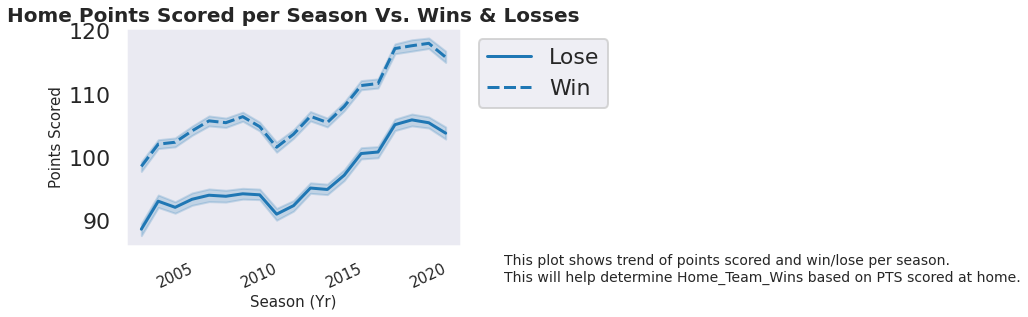

In [840]:
##Presentation #3 - Home Points and Win Lose Synergy
sns.axes_style("darkgrid")
sns.lineplot(data=df, x="SEASON", y="PTS_home", style="HOME_TEAM_WINS")
plt.xticks(rotation = 80, fontsize = 12)
plt.xlabel('Season (Yr)', fontsize = 15)
plt.xticks(rotation = 25, fontsize = 15)
plt.ylabel('Points Scored', fontsize = 15)
plt.title('Home Points Scored per Season Vs. Wins & Losses',  fontsize = 20, fontweight='bold')
plt.legend(labels=['Lose','Win'],
           bbox_to_anchor=(1.02, 1))
plt.figtext(1, 0, "This plot shows trend of points scored and win/lose per season. \nThis will help determine Home_Team_Wins based on PTS scored at home.", fontsize=14)
plt.tight_layout;

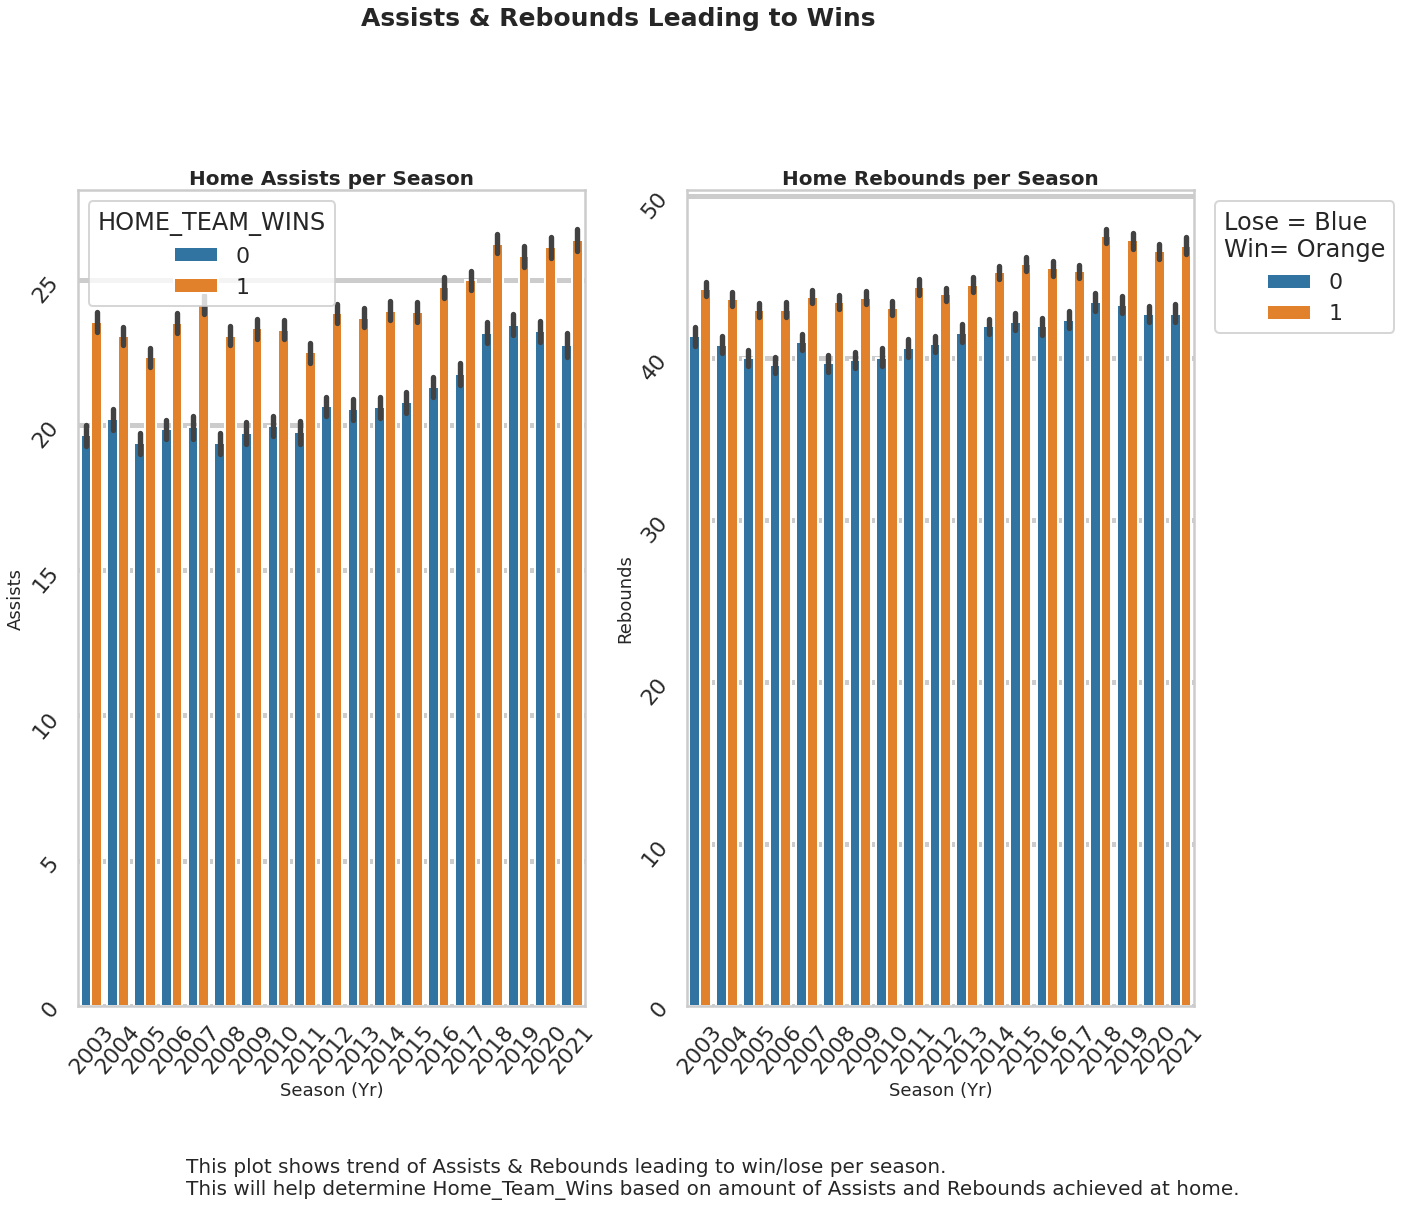

In [841]:
#Presentation #4 - Ast. Reb. Leading to Wins
sns.set_style("whitegrid")
fig, axes = plt.subplots(ncols=2, figsize=(20,15))
for ax in fig.axes:
    ax.tick_params(labelrotation=50)

sns.barplot(x="SEASON", y="AST_home", hue="HOME_TEAM_WINS", data=df, ax=axes[0])
axes[0].set_xlabel('Season (Yr)', fontsize = 18)
axes[0].set_ylabel('Assists', fontsize = 18)
axes[0].set_title('Home Assists per Season',  fontsize = 20, fontweight='bold')
plt.legend(title='Home Team Wins', labels=['Lose','Win'], bbox_to_anchor=(1.02, 1))

sns.barplot(x="SEASON", y="REB_home", hue="HOME_TEAM_WINS", data=df, ax=axes[1])
axes[1].set_xlabel('Season (Yr)', fontsize = 18)
axes[1].set_ylabel('Rebounds', fontsize = 18)
axes[1].set_title('Home Rebounds per Season',  fontsize = 20, fontweight='bold')
plt.title("Home Rebounds per Season", fontsize = 20, fontweight='bold')

plt.legend(title='Lose = Blue \nWin= Orange', bbox_to_anchor=(1.02, 1))
fig.suptitle('Assists & Rebounds Leading to Wins', fontsize = 25, fontweight = 'bold', y=1.05)

plt.figtext(0.2, -0.05, "This plot shows trend of Assists & Rebounds leading to win/lose per season. \nThis will help determine Home_Team_Wins based on amount of Assists and Rebounds achieved at home.", fontsize=20)
plt.tight_layout;

##Preparing Data for Machine Learning:

In [842]:
##instantiate X, y and train test split
X = df.drop(columns= 'HOME_TEAM_WINS')
y = df['HOME_TEAM_WINS']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [843]:
#looking at shape
X_train.shape

(19347, 9)

In [844]:
#looking at X_train data
X_train

,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,GAME_month
19306,2018,115.0,0.419,0.846,0.357,19.0,44.0,117.0,2
6462,2011,99.0,0.452,0.775,0.154,24.0,45.0,103.0,3
20139,2018,93.0,0.382,0.808,0.190,16.0,44.0,108.0,10
23626,2015,110.0,0.448,0.762,0.348,26.0,46.0,101.0,1
8821,2009,86.0,0.408,0.850,0.538,21.0,38.0,84.0,3
...,...,...,...,...,...,...,...,...,...
21575,2016,110.0,0.408,0.652,0.333,24.0,52.0,107.0,5
5390,2012,100.0,0.432,0.760,0.367,24.0,45.0,87.0,1
860,2021,113.0,0.462,0.708,0.293,28.0,49.0,96.0,11
15795,2004,126.0,0.517,0.731,0.417,35.0,49.0,99.0,4


In [845]:
#loooking at NaN is train data, need to clean without leaking
X_train.isna().sum()

SEASON           0
PTS_home        70
FG_PCT_home     70
FT_PCT_home     70
FG3_PCT_home    70
AST_home        70
REB_home        70
PTS_away        70
GAME_month       0
dtype: int64

In [846]:
#instantiate num selector
num_selector = make_column_selector(dtype_include='number')

In [847]:
#instantiate scaler
scaler = StandardScaler()

In [848]:
#instantiate mean imputer
mean_imputer = SimpleImputer(strategy='mean')

In [849]:
#making number pipeline
number_pipeline = make_pipeline(scaler, mean_imputer)
number_pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('simpleimputer', SimpleImputer())])

In [850]:
# Tuples for Numbers 
number_tuple = (number_pipeline, num_selector)

In [851]:
#column transformer with preprocessing columns
preprocessing = make_column_transformer(number_tuple)
preprocessing

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa0e732eb10>)])

In [852]:
#fitting to x_train data
preprocessing.fit(X_train)

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa0e732eb10>)])

In [853]:
#fiting and transforming x train and x test
X_train_processed = preprocessing.fit_transform(X_train)
X_test_processed = preprocessing.fit_transform(X_test)

In [854]:
#Printing data for validation
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (19347, 9)




array([[ 1.14742949,  0.90613051, -0.73612115, ...,  0.10392312,
         1.25347236, -0.90072691],
       [-0.14643097, -0.31426732, -0.15210665, ...,  0.25467382,
         0.20368474, -0.66995083],
       [ 1.14742949, -0.77191651, -1.39092528, ...,  0.10392312,
         0.57860889,  0.94548175],
       ...,
       [ 1.70194111,  0.75358079,  0.02486744, ...,  0.85767662,
        -0.32120907,  1.17625784],
       [-1.44029142,  1.74515403,  0.99822494, ...,  0.85767662,
        -0.09625458, -0.43917475],
       [ 0.59291787,  1.21122997, -0.31138333, ...,  1.46067942,
         0.95353304, -1.131503  ]])

## Using PCA for the Supervised Machine Learning:

In [855]:
#Used mean imputer for NaN in X data
scaled_df = scaler.fit_transform(mean_imputer.fit_transform(X))

In [856]:
##instantiate PCA at 80% variance and fit to scaled df
pca = PCA(n_components=0.8)
pca.fit(scaled_df)

PCA(n_components=0.8)

In [857]:
#printing the components
print(pca.components_)

[[ 0.23486661  0.54786864  0.4632819   0.09484698  0.35270169  0.45707476
  -0.00622221  0.29154173 -0.05196581]
 [ 0.60694429  0.12060678 -0.35908232  0.1375545  -0.36778702 -0.09511728
   0.36901812  0.42671713  0.08145431]
 [ 0.0075579   0.06993682  0.01292345 -0.40136131  0.08731803  0.22695099
   0.73873629 -0.43940514  0.18935267]
 [ 0.08146773 -0.04572899  0.05256074 -0.43452132  0.02571189 -0.0185764
  -0.31122462  0.21389541  0.80998905]
 [ 0.10888314 -0.06988055  0.01185394 -0.77436117 -0.10041619  0.02886272
  -0.12268863  0.25380221 -0.54138795]]


In [858]:
#printing explained variance
print(pca.explained_variance_)

[2.77237942 1.38130858 1.14780285 1.0074544  0.94795741]


In [859]:
#printing ratio of explained variance
print(pca.explained_variance_ratio_)

[0.30803022 0.15347278 0.12752871 0.11193504 0.10532452]


##Logistic Regression with PCA Model 1:

In [860]:
# Creating transformer pipeline for pca at 80%
pca_transformer = make_pipeline(StandardScaler(), PCA(n_components=0.95))

In [861]:
logreg = LogisticRegression(random_state=42)
# Creating a modeling pipeline
pca_logreg_pipe = make_pipeline(pca_transformer, logreg)

In [862]:
pca_logreg_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=0.95))])),
                ('logisticregression', LogisticRegression(random_state=42))])

In [863]:
pca_logreg_train_pred = pca_logreg_pipe.predict(X_train_processed)
pca_logreg_test_pred = pca_logreg_pipe.predict(X_test_processed)

In [864]:
print('Training accuracy:', pca_logreg_pipe.score(X_train_processed, y_train))
print('Testing accuracy:', pca_logreg_pipe.score(X_test_processed, y_test))

Training accuracy: 0.8977102393135886
Testing accuracy: 0.9033958753295085


In [865]:
mae = mean_absolute_error(y_test, pca_logreg_test_pred)
mse = mean_squared_error(y_test, pca_logreg_test_pred)
rmse = np.sqrt(mse) 
r2 = r2_score(y_test,pca_logreg_test_pred)

print("Results of Testing Data")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of Testing Data
MAE: 0.09660412467049155
MSE: 0.09660412467049155
RMSE: 0.3108120407424583
R-Squared: 0.6018955932455978


##Tuning Logistic Regression with PCA Model 1:

{0.0001: 0.4143278027601178,
 0.001: 0.8658706776244379,
 0.01: 0.9051015661342844,
 0.1: 0.903861063730811,
 1: 0.9035509381299426,
 10: 0.9035509381299426,
 100: 0.9035509381299426,
 1000: 0.9035509381299426}

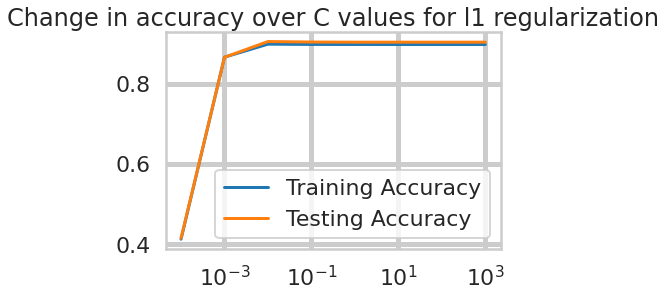

In [866]:
# create a list of c values and empty lists for check scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data with penalty L1
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(pca_transformer, log_reg)
  log_reg_pipe.fit(X_train_processed, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train_processed, y_train))
  test_scores.append(log_reg_pipe.score(X_test_processed, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}


{0.0001: 0.8618390448131493,
 0.001: 0.897658551713444,
 0.01: 0.9046363777329819,
 0.1: 0.9037060009303768,
 1: 0.9035509381299426,
 10: 0.9035509381299426,
 100: 0.9035509381299426,
 1000: 0.9035509381299426}

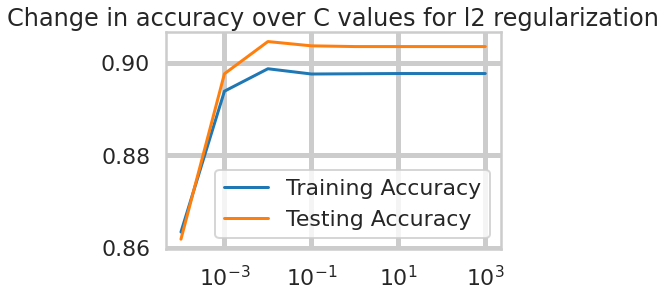

In [867]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
  # instantiate a model with each value of c and fit it on the data with penalty l2
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg_pipe = make_pipeline(pca_transformer, log_reg)
  log_reg_pipe.fit(X_train_processed, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train_processed, y_train))
  test_scores.append(log_reg_pipe.score(X_test_processed, y_test))
  
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}


In [868]:
#Based on above exploratory these are best parameters for tuned model
tun_logreg = LogisticRegression(C=0.01, penalty='l1', solver='liblinear', max_iter=1000)
# Creating a tune modeling pipeline
tun_pca_logreg_pipe = make_pipeline(pca_transformer, tun_logreg)

In [869]:
tun_pca_logreg_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=0.95))])),
                ('logisticregression',
                 LogisticRegression(C=0.01, max_iter=1000, penalty='l1',
                                    solver='liblinear'))])

In [870]:
tun_pca_logreg_train_pred = tun_pca_logreg_pipe.predict(X_train_processed)
tun_pca_logreg_test_pred = tun_pca_logreg_pipe.predict(X_test_processed)

In [871]:
print('Training accuracy:', tun_pca_logreg_pipe.score(X_train_processed, y_train))
print('Testing accuracy:', tun_pca_logreg_pipe.score(X_test_processed, y_test))

Training accuracy: 0.8986406161161937
Testing accuracy: 0.9051015661342844


In [872]:
mae = mean_absolute_error(y_test, tun_pca_logreg_test_pred)
mse = mean_squared_error(y_test, tun_pca_logreg_test_pred)
rmse = np.sqrt(mse) 
r2 = r2_score(y_test, tun_pca_logreg_test_pred)

print("Results of Testing Data")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of Testing Data
MAE: 0.09489843386571561
MSE: 0.09489843386571561
RMSE: 0.30805589406098954
R-Squared: 0.6089247240229628


##Logistic Regression Model 2:
- no PCA

In [873]:
#making pipeline for log reg normal
log_reg_pipe = make_pipeline(StandardScaler(), log_reg)

In [874]:
#Fitting log reg model to training data
log_reg_pipe.fit(X_train_processed,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1000, max_iter=1000,
                                    solver='liblinear'))])

In [875]:
#Making predictions using the train and testing data.
logreg_train_pred = log_reg_pipe.predict(X_train_processed)
logreg_test_pred = log_reg_pipe.predict(X_test_processed)

In [876]:
print('Training accuracy:', log_reg_pipe.score(X_train_processed, y_train))
print('Testing accuracy:', log_reg_pipe.score(X_test_processed, y_test))

Training accuracy: 0.9941076135835013
Testing accuracy: 0.993797487982633


In [877]:
#Checking MAE, MSE, RMSE, R2 scores
mae = mean_absolute_error(y_test, logreg_test_pred)
mse = mean_squared_error(y_test, logreg_test_pred)
rmse = np.sqrt(mse) 
r2 = r2_score(y_test, logreg_test_pred)

print("Results of Testing Data")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of Testing Data
MAE: 0.0062025120173670335
MSE: 0.0062025120173670335
RMSE: 0.07875602845095118
R-Squared: 0.9744395244459453


##Tuning Logistic Regression Model 2:

- no PCA

{0.0001: 0.4143278027601178,
 0.001: 0.9820127151496356,
 0.01: 0.9955031787874089,
 0.1: 0.9953481159869747,
 1: 0.9945728019848038,
 10: 0.9941076135835013,
 100: 0.9941076135835013,
 1000: 0.9939525507830671}

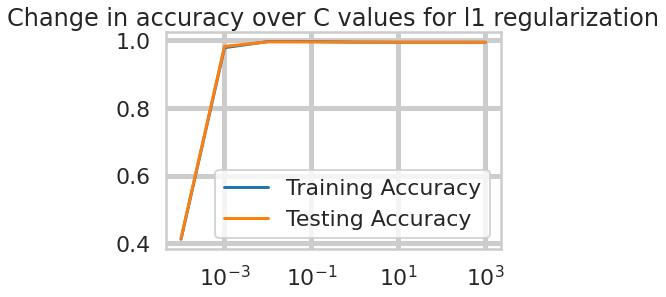

In [878]:
#testing hyper parameters
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data with penalty L1
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(StandardScaler(), log_reg)
  log_reg_pipe.fit(X_train_processed, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train_processed, y_train))
  test_scores.append(log_reg_pipe.score(X_test_processed, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

#Looks best ar c=0.01 with penalty= l1

{0.0001: 0.8747092572491859,
 0.001: 0.9371995658241588,
 0.01: 0.9813924639478989,
 0.1: 0.9951930531865405,
 1: 0.9951930531865405,
 10: 0.9945728019848038,
 100: 0.9941076135835013,
 1000: 0.993797487982633}

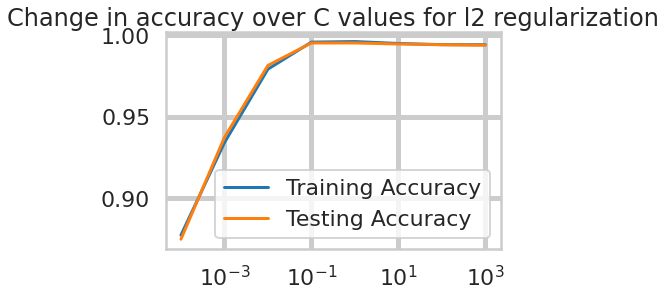

In [879]:
#testing hyper parameter 2
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

for c in c_values:
  # instantiate a model with each value of c and fit it on the data with penalty l2
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg_pipe = make_pipeline(StandardScaler(), log_reg)
  log_reg_pipe.fit(X_train_processed, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train_processed, y_train))
  test_scores.append(log_reg_pipe.score(X_test_processed, y_test))
  
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()

ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

#this shows penalty l2 does not have a higher accuracy score than above test with penalty l1

In [880]:
#tuned log reg
tun_log_reg = LogisticRegression(C=0.01, max_iter=1000, solver='liblinear', penalty='l1')

In [881]:
#making pipeline for tuned log reg 
tun_log_reg_pipe = make_pipeline(StandardScaler(), tun_log_reg)

In [882]:
#Fitting tun log reg model to training data
tun_log_reg_pipe.fit(X_train_processed,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.01, max_iter=1000, penalty='l1',
                                    solver='liblinear'))])

In [883]:
#Making predictions using the train and testing data.
tun_logreg_train_pred = tun_log_reg_pipe.predict(X_train_processed)
tun_logreg_test_pred = tun_log_reg_pipe.predict(X_test_processed)

In [884]:
print('Training accuracy:', tun_log_reg_pipe.score(X_train_processed, y_train))
print('Testing accuracy:', tun_log_reg_pipe.score(X_test_processed, y_test))

Training accuracy: 0.9963818679898693
Testing accuracy: 0.9955031787874089


In [885]:
#Checking MAE, MSE, RMSE, R2 scores
mae = mean_absolute_error(y_test, tun_logreg_test_pred)
mse = mean_squared_error(y_test, tun_logreg_test_pred)
rmse = np.sqrt(mse) 
r2 = r2_score(y_test, tun_logreg_test_pred)

print("Results of Testing Data")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of Testing Data
MAE: 0.004496821212591099
MSE: 0.004496821212591099
RMSE: 0.067058341856857
R-Squared: 0.9814686552233103


##Decision Tree Classifier with PCA Model 3:

In [886]:
#instantiate decision tree
dec_tree = DecisionTreeClassifier(random_state = 42)

In [887]:
# Creating a modeling pipeline
pca_dectree_pipe = make_pipeline(pca_transformer, dec_tree) 

In [888]:
#fitting dectree with pca
pca_dectree_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=0.95))])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [889]:
#model predict
pca_dectree_train_pred = pca_dectree_pipe.predict(X_train_processed)
pca_dectree_test_pred = pca_dectree_pipe.predict(X_test_processed)

In [890]:
print('Training accuracy:', pca_dectree_pipe.score(X_train_processed, y_train))
print('Testing accuracy:', pca_dectree_pipe.score(X_test_processed, y_test))

Training accuracy: 1.0
Testing accuracy: 0.8171809582881067


In [891]:
#Checking MAE, MSE, RMSE, R2 scores
mae = mean_absolute_error(y_test, pca_dectree_test_pred)
mse = mean_squared_error(y_test, pca_dectree_test_pred)
rmse = np.sqrt(mse) 
r2 = r2_score(y_test, pca_dectree_test_pred)

print("Results of Testing Data")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of Testing Data
MAE: 0.1828190417118933
MSE: 0.1828190417118933
RMSE: 0.42757343429157674
R-Squared: 0.24660498304423717


##Tuning Decision Tree Classifier with PCA Model 3:

In [892]:
#Tuned dec tree
tun_dec_tree = DecisionTreeClassifier(random_state = 42, max_depth=13)

In [893]:
# Creating a modeling pipeline
pca_tun_dectree_pipe = make_pipeline(pca_transformer, tun_dec_tree) 

In [894]:
#fitting tuned dectree with pca
pca_tun_dectree_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=0.95))])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=13, random_state=42))])

In [895]:
#model predict with changes
pca_tun_dectree_train_pred = pca_tun_dectree_pipe.predict(X_train_processed)
pca_tun_dectree_test_pred = pca_tun_dectree_pipe.predict(X_test_processed)

In [896]:
print('Training accuracy:', pca_tun_dectree_pipe.score(X_train_processed, y_train))
print('Testing accuracy:', pca_tun_dectree_pipe.score(X_test_processed, y_test))

Training accuracy: 0.9801519615444255
Testing accuracy: 0.8202822142967902


In [897]:
#Checking MAE, MSE, RMSE, R2 scores
mae = mean_absolute_error(y_test, pca_tun_dectree_test_pred)
mse = mean_squared_error(y_test, pca_tun_dectree_test_pred)
rmse = np.sqrt(mse) 
r2 = r2_score(y_test, pca_tun_dectree_test_pred)

print("Results of Testing Data")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of Testing Data
MAE: 0.1797177857032098
MSE: 0.1797177857032098
RMSE: 0.42393134550680467
R-Squared: 0.2593852208212646


##Decision Tree Classifier Model 4:
- no pca

In [898]:
#making pipeline for sec tree normal
dec_tree_pipe = make_pipeline(StandardScaler(), dec_tree)

In [899]:
#fitting dec tree
dec_tree_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [900]:
#model predict with normal
dectree_train_pred = dec_tree_pipe.predict(X_train_processed)
dectree_test_pred = dec_tree_pipe.predict(X_test_processed)

In [901]:
#checking accuracy
print('Training accuracy:', dec_tree_pipe.score(X_train_processed, y_train))
print('Testing accuracy:', dec_tree_pipe.score(X_test_processed, y_test))

Training accuracy: 1.0
Testing accuracy: 0.9956582415878431


In [902]:
#Checking MAE, MSE, RMSE, R2 scores
mae = mean_absolute_error(y_test, dectree_test_pred)
mse = mean_squared_error(y_test, dectree_test_pred)
rmse = np.sqrt(mse) 
r2 = r2_score(y_test, dectree_test_pred)

print("Results of Testing Data")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of Testing Data
MAE: 0.004341758412156923
MSE: 0.004341758412156923
RMSE: 0.06589202085349123
R-Squared: 0.9821076671121617


##Tuning Decision Tree Classifier Model 4:
- no pca

In [903]:
#Tuned dec tree 2nd time for Normal dec tree
Scnd_tun_dec_tree = DecisionTreeClassifier(random_state = 42, max_depth=12)

In [904]:
# Creating a modeling pipeline fir tuned dec tree
tun_dectree_pipe = make_pipeline(StandardScaler(), Scnd_tun_dec_tree) 

In [905]:
#fitting tuned dec tree
tun_dectree_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=12, random_state=42))])

In [906]:
#model predict with tuned parameters
tun_dectree_train_pred = tun_dectree_pipe.predict(X_train_processed)
tun_dectree_test_pred = tun_dectree_pipe.predict(X_test_processed)

In [907]:
#checking accuracy
print('Training accuracy:', tun_dectree_pipe.score(X_train_processed, y_train))
print('Testing accuracy:', tun_dectree_pipe.score(X_test_processed, y_test))

Training accuracy: 0.9998449371995658
Testing accuracy: 0.9961234299891456


In [908]:
#Checking MAE, MSE, RMSE, R2 scores
mae = mean_absolute_error(y_test, tun_dectree_test_pred)
mse = mean_squared_error(y_test, tun_dectree_test_pred)
rmse = np.sqrt(mse) 
r2 = r2_score(y_test, tun_dectree_test_pred)

print("Results of Testing Data")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of Testing Data
MAE: 0.003876570010854396
MSE: 0.003876570010854396
RMSE: 0.06226210734350706
R-Squared: 0.9840247027787158


In [909]:
#Getting precision_score, recall_score, f1_score
precision_score = precision_score(y_test, tun_dectree_test_pred, average=None)
recall_score = recall_score(y_test, tun_dectree_test_pred, average=None)
f1_score = f1_score(y_test, tun_dectree_test_pred, average=None)
precision_recall_fscore_support = precision_recall_fscore_support(y_test, tun_dectree_test_pred, average=None)

print("2nd Results of Testing Data")
print("Precision score:", precision_score)
print("Recall score:", recall_score)
print("F1 score:", f1_score)
print("Precision, Recall, Fscore:", precision_recall_fscore_support)

2nd Results of Testing Data
Precision score: [0.99699587 0.99550977]
Recall score: [0.99363772 0.99788192]
F1 score: [0.99531396 0.99669443]
Precision, Recall, Fscore: (array([0.99699587, 0.99550977]), array([0.99363772, 0.99788192]), array([0.99531396, 0.99669443]), array([2672, 3777]))


##Evaluating Model Performance: 
- Examining the appropriate metrics.
- Choosing the "production" model and justify this decision.

All of the 4 different models (Logistic Regression & Decision Tree Classifier) with and without Principal Component Analisis (PCA) tested great on the data set.

- The 2 models with PCA and no tuning did overall the worst with accuracy on the testing data between 82-91% and the coefficient of determination (r2) scores being low as well ranging from 25-61%. Meaning that it could only explain at most 61% of the variation in the target data of the model.

- The next lowest models were also PCA but with some tuning of the Logistic Regression & Decision Tree Classifier hyperparameters. These two models had a slight increase in accuracy on the testing data being between 83-91%. They also had a slight increase in the r2 scores, being between 26-61%. 

- The next best models were Logistic Regression & Decision Tree Classifier without tuning. Their accuracy on the testing data was between 99.37-99.56%. A dramatic increase. Their r2 scores were also high, being between 97.44-98.20%. The only issue with these models is a concern of overfitting that data. 

- The best out of my analysis were the tuned Logistic Regression & Decision Tree Classifier models. Slight tuning of each model hyperparameters was able to increase data prediction accuracy and lower overfitting of the data. Their accuracy on the testing data had a little increase and was between 99.55-99.61%. The r2 scores also slightly increase being between 98.14-98.40%.  

Overall, from my analysis and the models, the PCA did not increase accurate prediction of the models or accurately explain the variances. Thus, in my opinion the best model to implement is the tuned Decision Tree Classifier. This model also has the lowest r2 score, Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE). All of which are below 0.06. 

For the tuned Decision Tree Classifier, the Precision, Recall, and F1 scores were also high ranking. I used these 2nd results of testing the data to justify my choice. 
- The Precision score shows 99.55% of the time the model intuitively shows the ability of the classifier not to label a negative sample as positive. 
- The Recall score of 99.78% shows that the model is able to find almost all of the positive samples. 
- In addition, with 99.66% F1 scores, the model compares the performance of two classifiers really well.